### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Loading Data

In [2]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='WvHv1VBRGn5RCNu8lvnVk6b2Ny1sXR5heWgqP9Augoib',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'universityadmiteligibilitypredict-donotdelete-pr-sm0gvpuijhrvxt'
object_key = 'Admission_Predict.xlsx'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']

data = pd.read_excel(body.read())


In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.shape

(400, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Pre Processing
### 1. Checking for null values

In [7]:
Null=data.isnull()
Null.sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### 2.Duplicate detection

In [8]:
data.duplicated().sum()

0

### 3. Drop unwanted columns

In [9]:
data.drop('Serial No.', axis='columns', inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Visualization
### 1.GRE Score

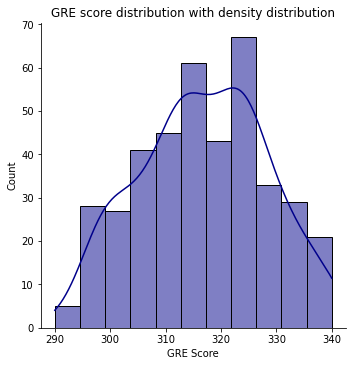

In [10]:
sns.displot(x=data["GRE Score"], kde=True, color='darkblue')
plt.title("GRE score distribution with density distribution");

### 2.TOFEL Score :

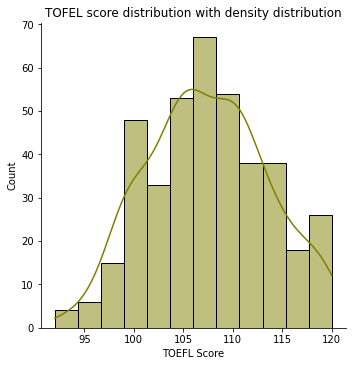

In [11]:
sns.displot(x=data["TOEFL Score"], kde=True, color='olive')
plt.title("TOFEL score distribution with density distribution");

### 3. University Ratings

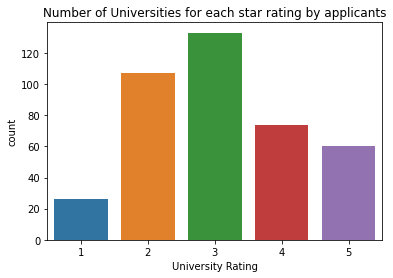

In [12]:
sns.countplot(x=data["University Rating"]);
plt.title("Number of Universities for each star rating by applicants");

### 4. SOP : Statement for purpose

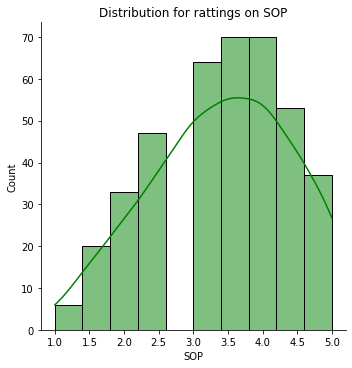

In [13]:
sns.displot(x=data["SOP"], kde=True, color='green');
plt.title("Distribution for rattings on SOP");

### 5. LOR : Letter of Recommendations

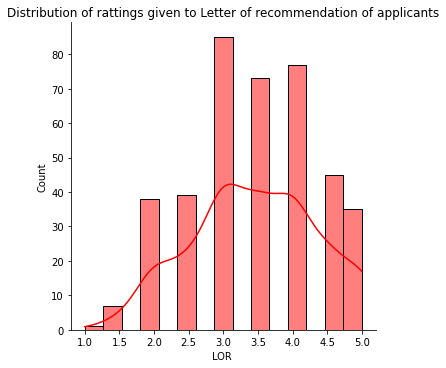

In [14]:
sns.displot(x=data["LOR "], kde=True, color='red');
plt.title("Distribution of rattings given to Letter of recommendation of applicants");

### 6.CGPA

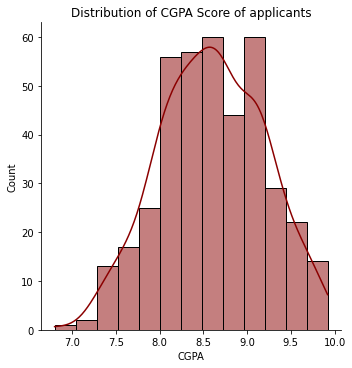

In [15]:
sns.displot(x=data["CGPA"], kde=True, color='darkred');
plt.title("Distribution of CGPA Score of applicants");

### 7.RESEARCH

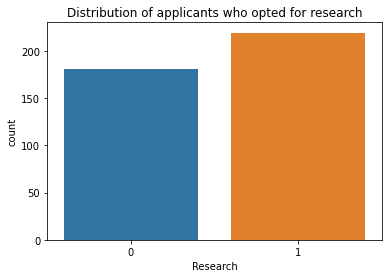

In [16]:
sns.countplot(x=data["Research"]);
plt.title("Distribution of applicants who opted for research");

### 8.Chance of Admit

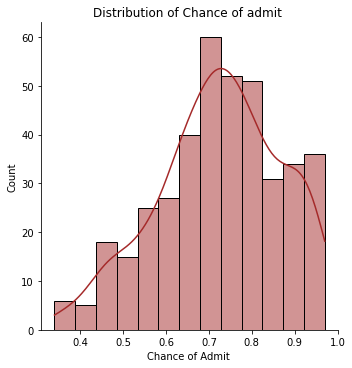

In [17]:
sns.displot(x=data["Chance of Admit "], kde=True, color='brown');
plt.title("Distribution of Chance of admit ");

### Bivariate Analysis

#### 1. GRE Score with Chance of Admit and Research :

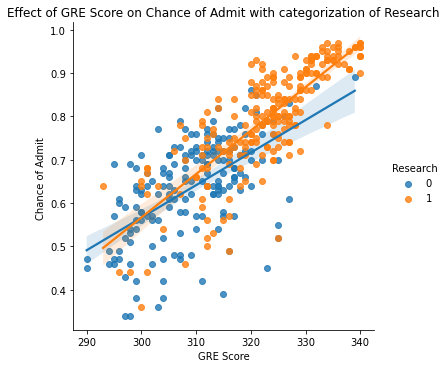

In [18]:
sns.lmplot(y="Chance of Admit ", x = "GRE Score", hue="Research", data=data);
plt.title("Effect of GRE Score on Chance of Admit with categorization of Research");

#### 2. TOFEL Score with Chance of Admit and Research :

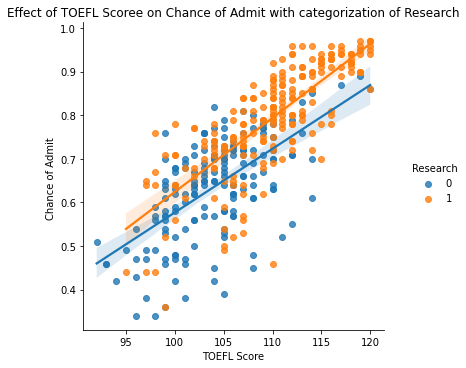

In [19]:
sns.lmplot(y="Chance of Admit ", x = "TOEFL Score", hue="Research", data=data);
plt.title("Effect of TOEFL Scoree on Chance of Admit with categorization of Research");

#### 3. University Rating with Chance of Admit and Research :

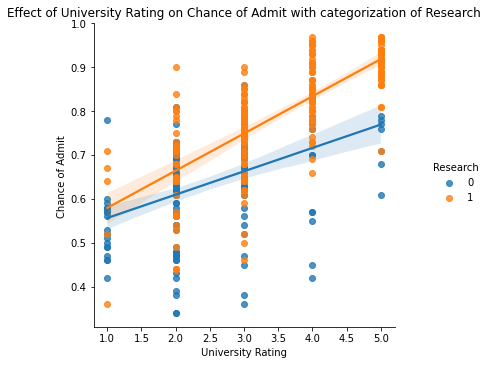

In [20]:
sns.lmplot(y="Chance of Admit ", x = "University Rating", hue="Research", data=data);
plt.title("Effect of University Rating on Chance of Admit with categorization of Research");

#### 4. Statement of purpose (SOP) with Chance of Admit and Research :

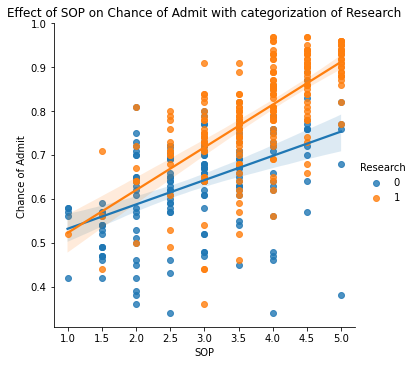

In [21]:
sns.lmplot(y="Chance of Admit ", x = "SOP", hue="Research", data=data);
plt.title("Effect of SOP on Chance of Admit with categorization of Research");

#### 5. Letter of Recommendations (LOR) with Chance of Admit and Research :

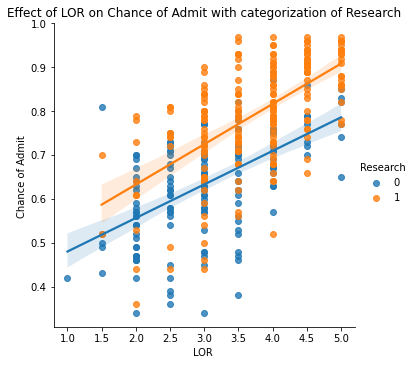

In [22]:
sns.lmplot(y="Chance of Admit ", x = "LOR ", hue="Research", data=data);
plt.title("Effect of LOR on Chance of Admit with categorization of Research");

#### 6. GPA with Chance of Admit and Research

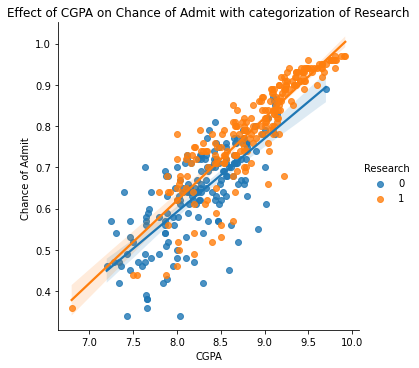

In [23]:
sns.lmplot(y="Chance of Admit ", x = "CGPA", hue="Research", data=data);
plt.title("Effect of CGPA on Chance of Admit with categorization of Research");

In [24]:
data = data.reset_index(drop=True)

## Model Building :

### 1.Data Preprations:

In [25]:
X = data[data.columns.drop('Chance of Admit ')]
y = data["Chance of Admit "]

In [26]:
X.shape

(400, 7)

In [27]:
y.shape

(400,)

### 2. Train test split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [29]:
X_train.shape

(320, 7)

In [30]:
X_test.shape

(80, 7)

### Applying different types of Algorithms

#### 1.Linear Regression

In [31]:
#model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)


LinearRegression()

In [32]:
model_reg = LinearRegression(normalize=True)
model_reg.fit(X_test, y_test)
print ("Accuracy : ",model_reg.score(X_test, y_test)*100)
methodDict = {}
methodDict['Linear Regression'] = model_reg.score(X_test, y_test)*100

Accuracy :  80.72164388568929


In [33]:
from sklearn.ensemble import RandomForestRegressor
rgr=RandomForestRegressor()
rgr.fit(X_train,y_train)

RandomForestRegressor()

In [34]:
print ("Accuracy : ",rgr.score(X_test, y_test)*100)
methodDict['Random Forest'] = rgr.score(X_test, y_test)*100

Accuracy :  72.73417576513013


### Visualizing the accuracy of the three models

In [35]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar') 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([0, 100.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')
     
    plt.show()

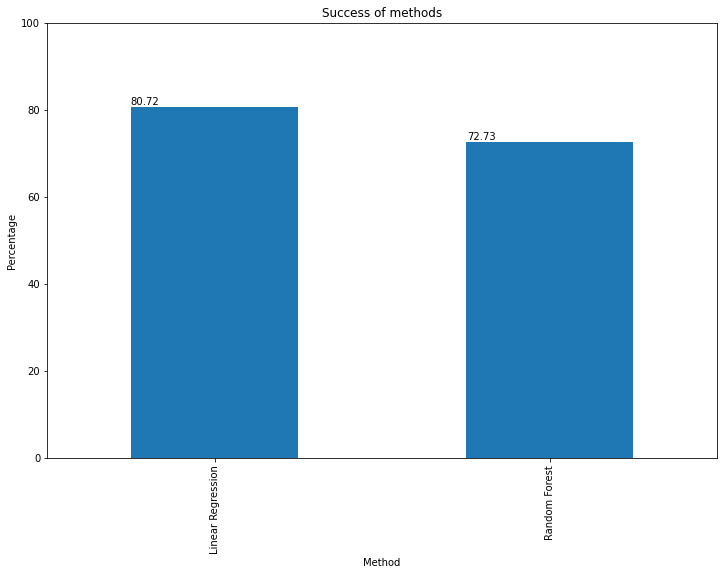

In [36]:
plotSuccess()

## Linear Regression is the one with more accuracy
### We will proceed with Linear Regression model
### Predicting for user given data

In [37]:
model_reg
print('The chance of you getting an admit in the US is {}%'.format(round(model_reg.predict([[310, 105, 5, 4.5, 3, 8.34, 1]])[0]*100, 1)))

The chance of you getting an admit in the US is 74.0%


In [38]:
!pip install ibm_watson_machine_learning

In [39]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url" : "https://us-south.ml.cloud.ibm.com",
    "apikey" : "BxlhEelaznEcKp22GNMIYzkR39dv03gwxMsLiHyK30Vb"
}
client = APIClient(wml_credentials)
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------  ------------------------
ID                                    NAME    CREATED
9b392b89-9503-4776-b213-515af2e95b84  model   2022-11-15T16:39:51.683Z
4c1badd8-3f66-41f1-955f-91399384b60e  models  2022-11-15T15:39:51.207Z
------------------------------------  ------  ------------------------


In [40]:
def guid_from_space_name(client, space_name): 
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] ==space_name)['metadata']['id'])

In [41]:
space_uid = guid_from_space_name(client, 'model')
print("Space UID :"+space_uid)

Space UID :9b392b89-9503-4776-b213-515af2e95b84


In [42]:
client.set.default_space(space_uid)

'SUCCESS'

In [45]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [47]:
import sklearn
sklearn.__version__

'1.0.2'

In [50]:
Model_name="Admission Predict"
Deployment_name="Admission Model"
Demo_model=model_reg

In [56]:
soft_spec_id=client.software_specifications.get_id_by_name("runtime-22.1-py3.9")

In [57]:
model_props = {
        client.repository.ModelMetaNames.NAME: Model_name,
        client.repository.ModelMetaNames.TYPE: "scikit-learn_1.0",
        client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: soft_spec_id}

In [58]:
model_details=client.repository.store_model(model=Demo_model,meta_props=model_props,training_data=X_train,training_target=y_train.values.ravel())

In [59]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l1',
  'schemas': {'input': [{'fields': [{'name': 'GRE Score', 'type': 'int64'},
      {'name': 'TOEFL Score', 'type': 'int64'},
      {'name': 'University Rating', 'type': 'int64'},
      {'name': 'SOP', 'type': 'float64'},
      {'name': 'LOR ', 'type': 'float64'},
      {'name': 'CGPA', 'type': 'float64'},
      {'name': 'Research', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-17T07:35:34.208Z',
  'id': '062fa27b-2812-48b2-b122-43a1d4d2888f',
  'modified_at': '2022-11-17T07:35:37.492Z',
  'name': 'Admission Predict',
  'owner': 'IBMid-668000FK9O',
  'resource_key': 'a0996528-9eb2-413f-98b8-c4bce8cfd846',
  'space_id': '9b392b89-9503-4776-b213-515af2e95b84'},
 'system': {'warnings': []}}

In [60]:
model_id=client.repository.get_model_id(model_details)

In [61]:
model_id

'062fa27b-2812-48b2-b122-43a1d4d2888f'

In [63]:
dep_props={
    client.deployments.ConfigurationMetaNames.NAME:Deployment_name,
    client.deployments.ConfigurationMetaNames.ONLINE:{}
}


In [65]:
deployment=client.deployments.create(artifact_uid=model_id,meta_props=dep_props)



#######################################################################################

Synchronous deployment creation for uid: '062fa27b-2812-48b2-b122-43a1d4d2888f' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='011d1e6b-5f8e-4901-bbe4-02011304d2c8'
------------------------------------------------------------------------------------------------


